# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [8]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

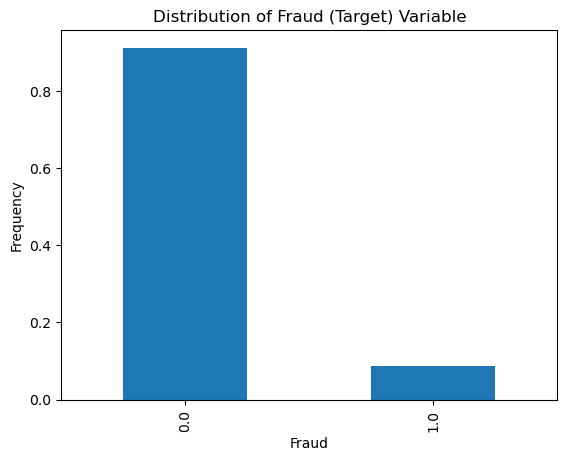

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar la distribución de la variable objetivo
fraud['fraud'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Fraud (Target) Variable')
plt.ylabel('Frequency')
plt.xlabel('Fraud')
plt.show()

- **2.** Train a LogisticRegression.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Variables predictoras y objetivo
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluar el modelo
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

[[271912   1959]
 [ 10495  15634]]


- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [12]:
from sklearn.metrics import roc_auc_score

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.7955930038020131


- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [13]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Entrenar de nuevo con datos balanceados
logreg.fit(X_resampled, y_resampled)
y_pred_resampled = logreg.predict(X_test)

# Evaluar el modelo balanceado
print(classification_report(y_test, y_pred_resampled))
print(f'ROC-AUC Score after Oversampling: {roc_auc_score(y_test, y_pred_resampled)}')

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    273871
         1.0       0.57      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score after Oversampling: 0.9418506651959533


- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Entrenar de nuevo con datos balanceados
logreg.fit(X_resampled, y_resampled)
y_pred_resampled = logreg.predict(X_test)

# Evaluar el modelo balanceado
print(classification_report(y_test, y_pred_resampled))
print(f'ROC-AUC Score after Undersampling: {roc_auc_score(y_test, y_pred_resampled)}')

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    273871
         1.0       0.57      0.95      0.71     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score after Undersampling: 0.9418518827797993


- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [15]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar de nuevo con datos balanceados
logreg.fit(X_resampled, y_resampled)
y_pred_resampled = logreg.predict(X_test)

# Evaluar el modelo balanceado
print(classification_report(y_test, y_pred_resampled))
print(f'ROC-AUC Score after SMOTE: {roc_auc_score(y_test, y_pred_resampled)}')

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273871
         1.0       0.58      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score after SMOTE: 0.9410621064437347
